### Non-Linear Regression

#### Formula for Exponential Functions: Y = Theta0 + Theta1Theta2^x

#### Formula for Polynomial Functions: Y = Theta0 + Theta1x + Theta2x^2 + ... + ThetaNx^N
- By turning x^1 to x_1, x^2 to x_2 etc. A polynomial regression model can be transformed into a linear model
- The multiple regression model is created by a least squares algorithm, such as Gradient Descent
- Least squares algorithms try to minimize the sum of the squares of the distances between y and Y
- Y must be a non-linear function with parameters being Theta

In [1]:
# Reading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cdf = pd.read_csv("FuelConsumptionCo2.csv")[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

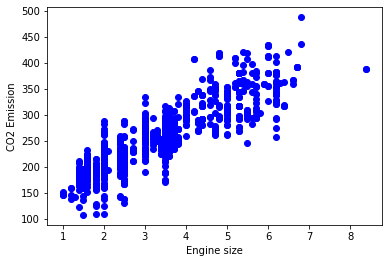

In [3]:
# Visualizing data

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

In [4]:
# Train-test split
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test = cdf[~mask]

Let's say we want to do a Polynomial Regression with the following equation:

**Y = Theta0 + Theta1x +Theta2x^2**

We only have x values but we need to convert them into 1, x, x^2 values.

**PolynomialFeatures() from sklearn drives a new feature set from the original feature set.**

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

# We need 3 features, so the degree of our polynomial function must be 2
pf = PolynomialFeatures(degree=2)

# fit_transform takes our x values and creates 1, x, x^2 values
train_x_poly = pf.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [10]:
# Since we can have 1, x and x^2 as x1, x2 and x3 parameters, we can treat this as a linear problem.
# This shows that polynomial regression is a special case of traditional multiple linear regression. (wow)

clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y) # Here we put both train_y and train_y_poly in the fit function

# Coefficients and the intercept of our linear function
print("Coefficients", clf.coef_)
print("Intercept", clf.intercept_)

Coefficients [[ 0.         51.27574321 -1.59611942]]
Intercept [106.24808244]


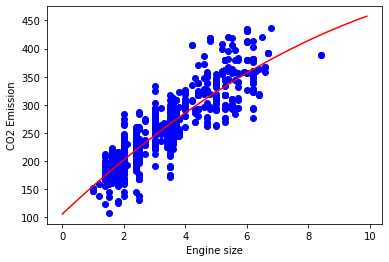

In [11]:
# Visualizing the Polynomial Regression degree 2.

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1) # Engine size goes 0 to 10 with 0.1 changes
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2) # Creating the polynomial
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

In [13]:
# Evaluation of our Polynomial Regression model
from sklearn.metrics import r2_score

test_x_poly = pf.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 25.91
Residual sum of squares (MSE): 1110.31
R2-score: 0.65
